In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Chuẩn bị dữ liệu

In [2]:
raw_data = pd.read_csv('redwine.csv', header = 0)
raw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data = raw_data.copy()
data = data.drop('quality',axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Tính trung bình của các biến

In [4]:
mean = np.mean(data, axis=0)
print(mean)

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
dtype: float64


Chuẩn hóa dữ liệu

In [5]:
def normalized_data(data):
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    normalized_data = (data - mean) / std
    return normalized_data
data = normalized_data(data)

In [6]:
data.isnull().sum()
data.fillna(value=1, inplace=True)

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

#### Tính ma trận hiệp phương sai

In [8]:
cov = pd.DataFrame(data.corr())
cov

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


#### Tính các giá trị riêng và vector riêng

In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov)

#### Sắp xếp các giá trị riêng theo thứ tự giảm dần

In [10]:
sorted_index = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_index]
sorted_eig_vecs = eig_vecs[:, sorted_index]

In [11]:
print("Các giá trị riêng được sắp xếp giảm dần:")
print(sorted_eig_vals)

Các giá trị riêng được sắp xếp giảm dần:
[3.09913244 1.92590969 1.55054349 1.21323253 0.95929207 0.65960826
 0.58379122 0.4229567  0.34464212 0.18133317 0.05955831]


In [12]:
print("Các vector riêng được sắp xếp tương ứng với các giá trị riêng:")
print(sorted_eig_vecs)

Các vector riêng được sắp xếp tương ứng với các giá trị riêng:
[[-0.48931422  0.11050274  0.12330157  0.22961737  0.08261366  0.10147858
  -0.35022736 -0.17759545  0.19402091 -0.24952314 -0.63969145]
 [ 0.23858436 -0.27493048  0.44996253 -0.07895978 -0.21873452  0.41144893
  -0.5337351  -0.07877531 -0.1291103   0.36592473 -0.0023886 ]
 [-0.46363166  0.15179136 -0.23824707  0.07941826  0.05857268  0.06959338
   0.10549701 -0.37751558 -0.38144967  0.62167708  0.0709103 ]
 [-0.14610715 -0.27208024 -0.10128338  0.37279256 -0.73214429  0.04915555
   0.29066341  0.29984469  0.00752295  0.09287208 -0.18402996]
 [-0.21224658 -0.14805156  0.09261383 -0.66619476 -0.2465009   0.30433857
   0.37041337 -0.35700936  0.11133867 -0.21767112 -0.05306532]
 [ 0.03615752 -0.51356681 -0.42879287  0.04353782  0.15915198 -0.01400021
  -0.11659611 -0.2047805   0.63540522  0.24848326  0.05142086]
 [-0.02357485 -0.56948696 -0.3224145   0.03457712  0.22246456  0.13630755
  -0.09366237  0.01903597 -0.59211589 -0.

#### Tính tỉ lệ phương sai giải thích bởi mỗi thành phần chính

In [13]:
explained_variance_ratio = sorted_eig_vals / np.sum(sorted_eig_vals)

In [14]:
print("Tỉ lệ phương sai giải thích bởi mỗi thành phần chính:")
print(explained_variance_ratio)

Tỉ lệ phương sai giải thích bởi mỗi thành phần chính:
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]


In [15]:
#Đầu vào: tỉ lệ giải thích cho tổng thể, mảng các phương sai(Giá trị riêng)
#Đầu ra: Số thành phần chính cần chọn
def chose_factor(rate,arr_lambda):
  cs=np.cumsum(arr_lambda)
  cs=cs/cs[-1]
  for i in range(len(cs)):
    if cs[i]>=rate:
      break
  plt.plot([y for y in range(1,len(arr_lambda)+1)],cs,"-o")
  plt.ylabel("Tỷ lệ giải thích")
  plt.xlabel("Số thành thành phần chính")
  return i+1

7

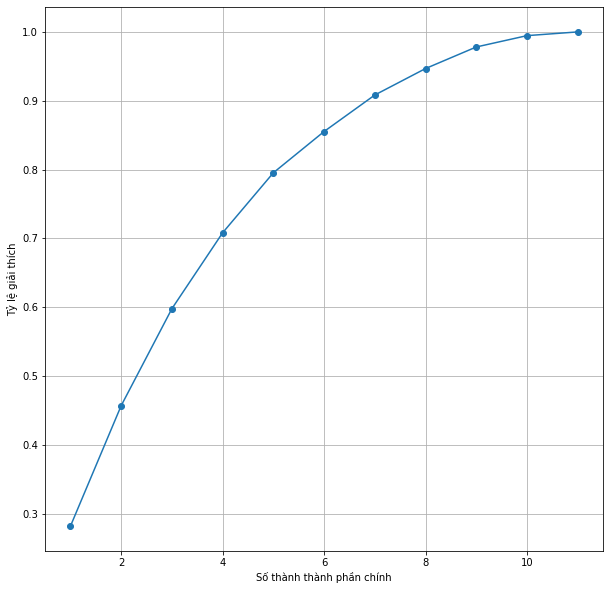

In [16]:
plt.figure(figsize=(10,10))
plt.grid("on")
chose_factor(0.9,sorted_eig_vals)

#### Chọn số lượng thành phần chính cần giữ lại

In [17]:
n_components = 7

#### Lấy n_components thành phần chính đầu tiên

In [18]:
principal_components = sorted_eig_vecs[:, :n_components]

#### Chiếu dữ liệu ban đầu lên các thành phần chính để giảm chiều dữ liệu

In [19]:
pca_data = np.dot(data, principal_components)

In [20]:
print("Dữ liệu sau khi được chiếu lên các thành phần chính:")
pd.DataFrame(pca_data).to_csv('pcadataset.csv', index_label = "Index") 
pd.DataFrame(pca_data)

Dữ liệu sau khi được chiếu lên các thành phần chính:


,0,1,2,3,4,5,6
0,1.619530,-0.450950,1.774454,-0.043740,-0.067014,-0.913921,-0.161043
1,0.799170,-1.856553,0.911690,-0.548066,0.018392,0.929714,-1.009829
2,0.748479,-0.882039,1.171394,-0.411021,0.043531,0.401473,-0.539553
3,-2.357673,0.269976,-0.243489,0.928450,1.499149,-0.131017,0.344290
4,1.619530,-0.450950,1.774454,-0.043740,-0.067014,-0.913921,-0.161043
...,...,...,...,...,...,...,...
1594,2.150500,-0.814286,-0.617063,-0.407687,0.240936,0.054835,0.170812
1595,2.214496,-0.893101,-1.807402,-0.414003,-0.119592,-0.674711,-0.607970
1596,1.456129,-0.311746,-1.124239,-0.491877,-0.193716,-0.506410,-0.231082
1597,2.270518,-0.979791,-0.627965,-0.639770,-0.067735,-0.860408,-0.321487


### In ra các kết quả

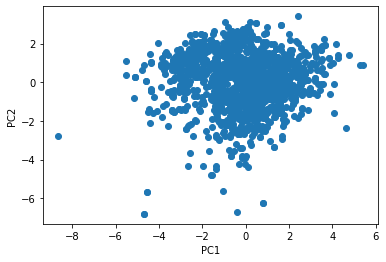

In [21]:
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

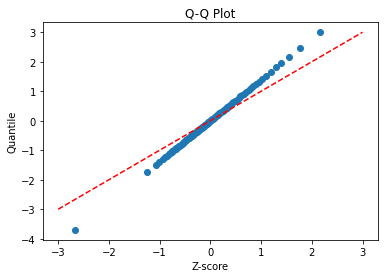

In [23]:
# generate some normally distributed data
pcadata = pca_data[:,1]

# calculate quantiles and z-scores
quantiles = np.percentile(data, np.arange(0, 100, 1))
z_scores = (quantiles - np.mean(pcadata)) / np.std(pcadata)

# plot the Q-Q plot
plt.scatter(z_scores, quantiles)
plt.plot([-3, 3], [-3, 3], 'r--')
plt.xlabel('Z-score')
plt.ylabel('Quantile')
plt.title('Q-Q Plot')
plt.show()